# Objective

### Build a system that can predict the prices for vehicles using data on Vehicle specifications,
make, etc. Explore the data to understand the features and figure out an approach.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [4]:
import warnings

In [5]:
warnings.filterwarnings('ignore')

In [6]:
# load dataset
data=pd.read_csv("C:\\Users\\Pankaj\\OneDrive\\Documents\\car data.csv")

In [7]:
data.head(5)

,name,description,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,2024 Jeep Wagoneer Series II,"\n \n Heated Leather Seats, Nav Sy...",Jeep,Wagoneer,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
1,2024 Jeep Grand Cherokee Laredo,Al West is committed to offering every custome...,Jeep,Grand Cherokee,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive
2,2024 GMC Yukon XL Denali,NaN,GMC,Yukon XL,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive
3,2023 Dodge Durango Pursuit,White Knuckle Clearcoat 2023 Dodge Durango Pur...,Dodge,Durango,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive
4,2024 RAM 3500 Laramie,\n \n 2024 Ram 3500 Laramie Billet...,RAM,3500,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive


In [8]:
# checking no of rows and col
data.shape

(1002, 17)

In [9]:
print("the no of rows",data.shape[0])
print("the no of column",data.shape[1])

the no of rows 1002
the no of column 17


In [10]:
# to check info of datast
data.info

<bound method DataFrame.info of                                                 name  \
0                       2024 Jeep Wagoneer Series II   
1                    2024 Jeep Grand Cherokee Laredo   
2                           2024 GMC Yukon XL Denali   
3                         2023 Dodge Durango Pursuit   
4                              2024 RAM 3500 Laramie   
...                                              ...   
997   2024 Mercedes-Benz Sprinter 2500 Standard Roof   
998           2024 Dodge Hornet Hornet R/T Plus Eawd   
999                          2024 Jeep Wagoneer Base   
1000           2024 Nissan Murano SV Intelligent AWD   
1001                2024 Chevrolet Silverado 2500 WT   

                                            description           make  \
0     \n      \n        Heated Leather Seats, Nav Sy...           Jeep   
1     Al West is committed to offering every custome...           Jeep   
2                                                   NaN            GMC   

In [11]:
# to check null value in our dataset
data.isnull().sum()

name                0
description        56
make                0
model               0
year                0
price              23
engine              2
cylinders         105
fuel                7
mileage            34
transmission        2
trim                1
body                3
doors               7
exterior_color      5
interior_color     38
drivetrain          0
dtype: int64

In [12]:
# get overall statistics about the dataset
data.describe()

,year,price,cylinders,mileage,doors
count,1002.000000,979.000000,897.000000,968.000000,995.000000
mean,2023.916168,50202.985700,4.975474,69.033058,3.943719
std,0.298109,18700.392062,1.392526,507.435745,0.274409
min,2023.000000,0.000000,0.000000,0.000000,2.000000
25%,2024.000000,36600.000000,4.000000,4.000000,4.000000
50%,2024.000000,47165.000000,4.000000,8.000000,4.000000
75%,2024.000000,58919.500000,6.000000,13.000000,4.000000
max,2025.000000,195895.000000,8.000000,9711.000000,5.000000


In [13]:
import datetime

In [14]:
date_time = datetime.datetime.now()

In [15]:
data['age']=date_time.year - data['year']

In [16]:
data.head()

,name,description,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain,age
0,2024 Jeep Wagoneer Series II,"\n \n Heated Leather Seats, Nav Sy...",Jeep,Wagoneer,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive,1
1,2024 Jeep Grand Cherokee Laredo,Al West is committed to offering every custome...,Jeep,Grand Cherokee,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive,1
2,2024 GMC Yukon XL Denali,NaN,GMC,Yukon XL,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive,1
3,2023 Dodge Durango Pursuit,White Knuckle Clearcoat 2023 Dodge Durango Pur...,Dodge,Durango,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive,2
4,2024 RAM 3500 Laramie,\n \n 2024 Ram 3500 Laramie Billet...,RAM,3500,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive,1


In [17]:
data.drop('year',axis=1,inplace=True)
data.head()

,name,description,make,model,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain,age
0,2024 Jeep Wagoneer Series II,"\n \n Heated Leather Seats, Nav Sy...",Jeep,Wagoneer,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive,1
1,2024 Jeep Grand Cherokee Laredo,Al West is committed to offering every custome...,Jeep,Grand Cherokee,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive,1
2,2024 GMC Yukon XL Denali,NaN,GMC,Yukon XL,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive,1
3,2023 Dodge Durango Pursuit,White Knuckle Clearcoat 2023 Dodge Durango Pur...,Dodge,Durango,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive,2
4,2024 RAM 3500 Laramie,\n \n 2024 Ram 3500 Laramie Billet...,RAM,3500,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive,1


### outlier removal

In [19]:
import seaborn as sns

<Axes: ylabel='price'>

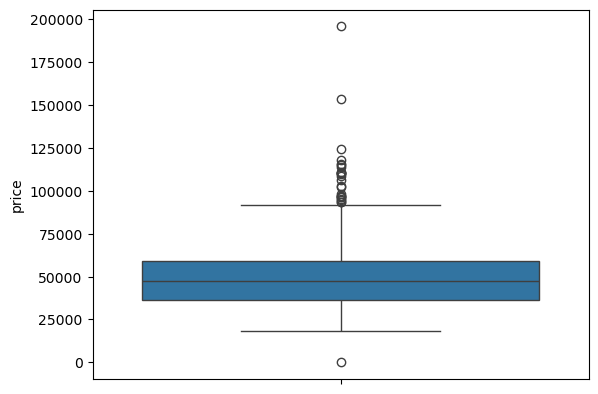

In [20]:
sns.boxplot(data['price'])

In [21]:
sorted(data['price'],reverse=True)

[96410.0,
 96410.0,
 89978.0,
 89555.0,
 89450.0,
 86670.0,
 86137.0,
 83630.0,
 81663.0,
 76535.0,
 74600.0,
 73020.0,
 69955.0,
 66334.0,
 65595.0,
 65315.0,
 65221.0,
 64670.0,
 63862.0,
 63223.0,
 63057.0,
 62341.0,
 60904.0,
 60555.0,
 60061.0,
 59547.0,
 59456.0,
 58930.0,
 58855.0,
 58709.0,
 58610.0,
 58599.0,
 55645.0,
 55365.0,
 54905.0,
 54559.0,
 53595.0,
 53190.0,
 52388.0,
 52190.0,
 51721.0,
 51695.0,
 51645.0,
 51645.0,
 51360.0,
 50915.0,
 50473.0,
 50170.0,
 49820.0,
 49628.0,
 49496.0,
 49390.0,
 49166.0,
 48705.0,
 48000.0,
 47790.0,
 47785.0,
 47234.0,
 46973.0,
 46835.0,
 46835.0,
 46000.0,
 46000.0,
 45005.0,
 44720.0,
 44354.0,
 44195.0,
 44161.0,
 44160.0,
 44120.0,
 44022.0,
 43727.0,
 43475.0,
 43419.0,
 42855.0,
 42773.0,
 42230.0,
 42015.0,
 42005.0,
 41180.0,
 40940.0,
 40474.0,
 39867.0,
 39714.0,
 39581.0,
 39491.0,
 38870.0,
 38740.0,
 38574.0,
 37743.0,
 36405.0,
 36083.0,
 35975.0,
 35870.0,
 35870.0,
 35864.0,
 35236.0,
 34990.0,
 34835.0,
 34084.0,


In [22]:
data = data[(data['price']>=89978.0) & (data['price']<=96410.0)]

In [23]:
data.shape

(12, 17)

In [24]:
data.head(1)

,name,description,make,model,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain,age
2,2024 GMC Yukon XL Denali,NaN,GMC,Yukon XL,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive,1


In [25]:
data['fuel'].unique()

array(['Gasoline', 'Diesel', 'Electric'], dtype=object)

In [26]:
data['fuel'] = data['fuel'].map({'Gasoline':0})

In [27]:
data['fuel'].unique()

array([ 0., nan])

In [28]:
data['transmission'].unique()

array(['Automatic', '10-Speed Automatic', '9-Speed Automatic',
       '1-Speed Automatic', '8-Speed Automatic'], dtype=object)

In [29]:
data['transmission'] = data['transmission'].map({'Automatic':0})

In [30]:
data['transmission'].unique()

array([ 0., nan])

In [31]:
data['trim'].unique()

array(['Denali', 'Lariat Super Duty', 'Base', 'M60', 'Limited',
       'xDrive40i', '4MATIC', 'Laramie'], dtype=object)

In [32]:
data['trim'] = data['trim'].map({'Denali':0})

In [33]:
data['trim'].unique()

array([ 0., nan])

## store feature matrix in X and response(Target) in vector Y

In [35]:
X = data.drop(['name','price'],axis=1)
y = data['price']

In [36]:
X

,description,make,model,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain,age
2,NaN,GMC,Yukon XL,"6.2L V-8 gasoline direct injection, variable v...",8.0,0.0,0.0,0.0,0.0,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive,1
7,\n \n Engine: 6.7L High Output Pow...,Ford,F-350,32V DDI OHV Turbo Diesel,8.0,NaN,15.0,NaN,NaN,Pickup Truck,4.0,Carbonized Gray Metallic,Black Onyx,Four-wheel Drive,1
81,NaN,GMC,Yukon XL,"6.2L V-8 gasoline direct injection, variable v...",8.0,0.0,0.0,0.0,0.0,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive,1
170,"\n \n Navigation, Sunroof, Heated ...",Mercedes-Benz,AMG GLE 53,24V GDI DOHC Turbo,6.0,0.0,10.0,NaN,NaN,SUV,4.0,Blue,Black,All-wheel Drive,1
227,2024 White Metallic BMW i5 4D Sedan Single-Spe...,BMW,i5,c,NaN,NaN,7.0,NaN,NaN,Sedan,4.0,Mineral White,Black,All-wheel Drive,1
305,2024 Ford Expedition Limited Star White Metall...,Ford,Expedition,24V PDI DOHC Twin Turbo,6.0,0.0,89.0,NaN,NaN,SUV,4.0,Star White,Black Onyx,Four-wheel Drive,1
424,2024 Black Sapphire Metallic BMW i5 4D Sedan S...,BMW,i5,c,NaN,NaN,3.0,NaN,NaN,Sedan,4.0,Black Sapphire,Black,All-wheel Drive,1
524,2025 BMW X7 xDrive40i,BMW,X7,24V DOHC,6.0,0.0,4.0,NaN,NaN,SUV,4.0,Aventurin Red Metallic,Black,All-wheel Drive,0
677,\n \n This GMC Sierra 2500HD deliv...,GMC,Sierra 2500,32V DDI OHV Turbo Diesel,8.0,NaN,0.0,NaN,0.0,Pickup Truck,4.0,Onyx Black,Jet Black,Four-wheel Drive,1
697,\n \n Recent Arrival! Doggett Merc...,Mercedes-Benz,GLS 450,24V GDI DOHC Turbo,6.0,0.0,8.0,NaN,NaN,SUV,4.0,Polar White,Macchiato Beige,All-wheel Drive,1


In [37]:
y

2      96410.0
7      89978.0
81     96410.0
170    90995.0
227    91825.0
305    90350.0
424    93335.0
524    90945.0
677    90220.0
697    95230.0
843    94895.0
873    93303.0
Name: price, dtype: float64

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

## import the model

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

## model training

In [43]:
lr = LinearRegression()
lr.fit(X_train,y_train)

rf = RandomForestRegressor()
rf.fit(X_train,y_train)

xgb = GradientBoostingRegressor()
xgb.fit(X_train,y_train)

xg = XGBRegressor()
xg.fit(X_train.y_train)

ValueError: could not convert string to float: '2024 BMW X7 xDrive40i'